In [17]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob


In [75]:
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Read the dataset from a CSV file
df = pd.read_csv('amazon_product_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

C:\Users\Lenovo Thinkpad T570\AppData\Local\Temp\ipykernel_2420\2588249963.py:5: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon_product_reviews.csv')


In [ ]:
# Drop na and unwanted columns
selected_columns = ['name', 'reviews.text', 'reviews.rating']
df = df[selected_columns]
df = df.dropna(subset=['reviews.text'])

# Tokenize the review text
tokenized_reviews = df['reviews.text'].apply(word_tokenize)
all_tokens = [token for review in tokenized_reviews for token in review]


In [ ]:
# Count most common words
word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(200)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
most_common_df.head()

# Define custom stop words
stop_words = spacy.lang.en.STOP_WORDS
polarity_negation ={
    # Negation words
    "not", "no", "never", "none", "neither", "nor", "nothing", "nobody", "nowhere", "no one",
    # Polarity words
    "good", "bad", "great", "terrible", "awful", "excellent", "fantastic", "amazing", "horrible",
    "positive", "negative", "happy", "sad", "love", "hate", "better"}

# Remove negation/polarity words and check overlap with most common words
stop_words_custom = stop_words - polarity_negation
most_common_set = set(most_common_df['Word'])
common_and_not_stop = most_common_set - polarity_negation
print(common_and_not_stop)

{'with', 'Christmas', 'have', 'as', 'your', 'recommend', 'purchase', 'Great', 'sound', 'Works', 'really', 'Echo', 'Amazon', '2', 'Love', 'time', 'what', 'easy', 'is', 'got', 'family', 'cable', 'The', 'was', 'its', 'lot', 'fire', 'them', 'home', 'fun', ')', 'because', 'than', 'could', 'perfect', 'these', 'so', '.', 'money', '...', 'be', 'little', 'life', 'reading', 'tablets', 'use', 'purchased', 'quality', 'echo', 'size', 'does', 'need', 'any', 'for', '!', 'only', 'up', 'which', 'it', 'all', 'amazon', 'without', 'first', 'movies', 'features', 'has', 'from', 'things', 'ca', 'who', 'Kindle', 'old', 'we', 'loves', 'music', 'It', 'now', '-', 'works', 'fast', 'well', 'are', 'far', 'able', 'been', 'more', ',', 'about', 'out', 'i', 'battery', 'daughter', 'Good', 'on', 'set', 'had', 'our', 'kindle', 'also', "n't", 'My', 'by', 'kids', 'buy', 'would', 'play', 'my', 'best', 'everything', 'too', 'year', 'device', 'light', 'read', 'using', 'tablet', 'You', 'will', 'She', 'like', 'If', 'screen', 'if'

In [ ]:
def preprocess_batch(texts):
    """
    Preprocesses a batch of text data by tokenizing, removing custom stop words, and joining tokens back into strings.

    Args:
        texts (list): A list of text strings to be preprocessed.

    Returns:
        list: A list of preprocessed text strings.
    """
    docs = list(nlp.pipe(texts))
    # Extract tokens without stop words for each document
    processed_texts = [" ".join([token.text for token in doc if token.text.lower() not in stop_words_custom]) for doc in docs]
    return processed_texts

In [74]:
# Preprocess the review text data
reviews = df['reviews.text'].tolist()
processed_reviews = preprocess_batch(reviews)
df['reviews.clean'] = processed_reviews
df.head()

KeyboardInterrupt: 

In [ ]:
def sentiment_analysis(text):
    """
    Performs sentiment analysis on a given text using TextBlob.

    Args:
        text (str): The text to be analyzed for sentiment.

    Returns:
        str: The sentiment label ('positive', 'negative', or 'neutral') based on the polarity score.
    """
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    # Determine sentiment label based on the polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Perform sentiment analysis on the preprocessed text data
df['sentiment'] = df['reviews.clean'].apply(sentiment_analysis)
df.head()
df.to_csv('sentiment_analysis.csv', index=False)

In [ ]:
def convert_rating_to_sent(rating):
    """
    Converts a numerical rating to a sentiment label.

    Args:
    rating (float): The numerical rating to be converted.

    Returns:
    str: The sentiment label ('positive', 'neutral', or 'negative') based on the rating.
    """
    if rating > 3:
        return 'positive'
    if rating == 3:
        return 'neutral'
    if rating < 3:
        return 'negative'

# Convert numerical ratings to sentiment labels
df['rating.sentiment'] = df['reviews.rating'].map(convert_rating_to_sent)
df.head()


,name,reviews.text,reviews.rating,reviews.clean,sentiment,rating.sentiment
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,product far not disappointed . children love u...,positive,positive
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,great beginner experienced person . Bought gif...,positive,positive
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,"Inexpensive tablet use learn , step NABI . thr...",positive,positive
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,Fire HD 8 weeks love . tablet great value . Pr...,positive,positive
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,"bought grand daughter comes visit . set user ,...",positive,positive


In [ ]:
# Save the processed data to a new CSV file
df.to_csv('sentiment_analysis.csv', index=False)

In [ ]:
# Print the counts of predicted and actual sentiment labels
df['sentiment'].value_counts()

sentiment
positive    30226
neutral      2768
negative     1665
Name: count, dtype: int64

In [ ]:
df['rating.sentiment'].value_counts()

rating.sentiment
positive    32315
neutral      1499
negative      812
Name: count, dtype: int64

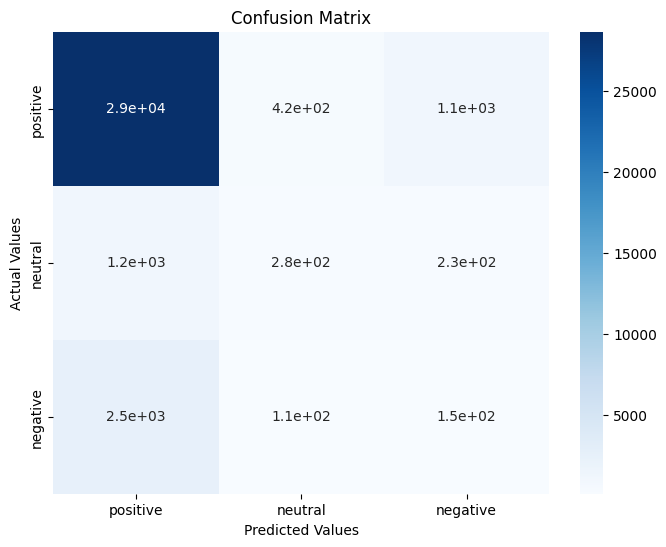

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
df = df.dropna(subset=['rating.sentiment'])
conf_matrix = confusion_matrix(df['sentiment'], df['rating.sentiment'], labels=['positive', 'negative', 'neutral'])

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['positive', 'neutral', 'negative'],
                               columns=['positive', 'neutral', 'negative'])

# Plot the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Get mismatched rows
mismatched_rows = df.loc[df['sentiment'] != df['rating.sentiment']]

# Print 10 random mismatched rows
mismatched_rows.count()

name                4524
reviews.text        5538
reviews.rating      5538
reviews.clean       5536
sentiment           5538
rating.sentiment    5538
dtype: int64

In [ ]:
# Print the total count of rows
df.count()

name                27867
reviews.text        34626
reviews.rating      34626
reviews.clean       34624
sentiment           34626
rating.sentiment    34626
dtype: int64